 <font size = 10 color=green>Vehicle sales data analysis</font>
***

<font size = 6 color=green>About this study</font>

 **Clustering: Extracting patterns from data**

The objective of this study is to analyze patterns in vehicle sales using the unsupervised learning technique called <b>Clustering</b> to identify behavior and characteristics of the most representative groups, and based on the conclusions to design a  efficient strategy to classify a vehicle according to its relevant characteristics and predict its sales price. This will allow evaluating the effectiveness of the strategy in a certain group of vehicle sales (cluster), having sales with similar behavioral patterns as a reference.

 **Procedures:**
1. Prepare the development environment in Jupiter notebook for Google Colab
2. Import libraries of the methods to use
3. Load the dataset into a DataFrame
4. Fetch information about the Dataframe variables
5. Preprocessing:
    - 5.1 Treatment of variables with missing values
    - 5.2 Treatment of extreme data and atypical data
    - 5.3 Scaling or  normalization of variables.
    - 5.4 Coding of categorical variables
6. Ejemplo básico de entrenamiento de un modelo
    - Definir los feactures
    - Elegimos el modelo
    - Probamos el modelo
    - Probamos la exactitud del modelo
    - Calculamos taza de aciertos
6. Clusters: Validation criteria and metrics
    - Silhouette coefficient
    - Davies-Bouldin index
    - Calinski-Harabasz index
7. Validating and visualizing the clusters.
   - Validating the structure of the closters
   - Validating the stability of the closters
8. Understanding attribute values ​​in clusters
9. Interpreting the clusters.
10. Using clusters

# **1. Prepare the development environment for Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -r "/content/drive/MyDrive/Colab Notebooks/240106-1_machine_learning_cars_price_prediction/requirements.txt"

In [3]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

# **2. Import libraries of the methods to use**

In [4]:
# The versions of the libraries that we will use are the following:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import missingno as msno
from sklearn.impute import SimpleImputer

# print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

from __future__ import division
from sklearn.cluster import KMeans

# **ImportError: The plotly.plotly module is deprecated, Solution : use the chart_studio.plotly module instead. **
import chart_studio.plotly as py
import plotly.graph_objs as go

# Runtime error: chart is displayed blank.
# When using Google Colab use the overall import statements below, this will set the rendering to Colab style and the plots will be displayed.
import plotly.offline as pyoff
#initiate visualization library for jupyter notebook
pyoff.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


# **3. Load the dataset into a DataFrame**

In [7]:
sales_data_file_path = '/content/drive/MyDrive/Colab Notebooks/240106-1_machine_learning_cars_price_prediction/datasets/Mint_Auction_used.csv'
car_sales_df = pd.read_csv(sales_data_file_path)

# **4. Fetch information about the Dataframe variables**

In [8]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


In [12]:
# car_sales_df.head(3)

,addref,city,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0


# **5. Preprocessing:**


Eliminate unnecessary variables or those that do not allow the dataframe to be read. It is always important, after performing an imputation, to verify that the distribution of our data, its trend or pattern, is not
be modified.



In [ ]:
#Let's verify that there are no duplicate rows
car_sales_df[car_sales_df.duplicated()]

## **5.1 Treatment of variables with missing values**


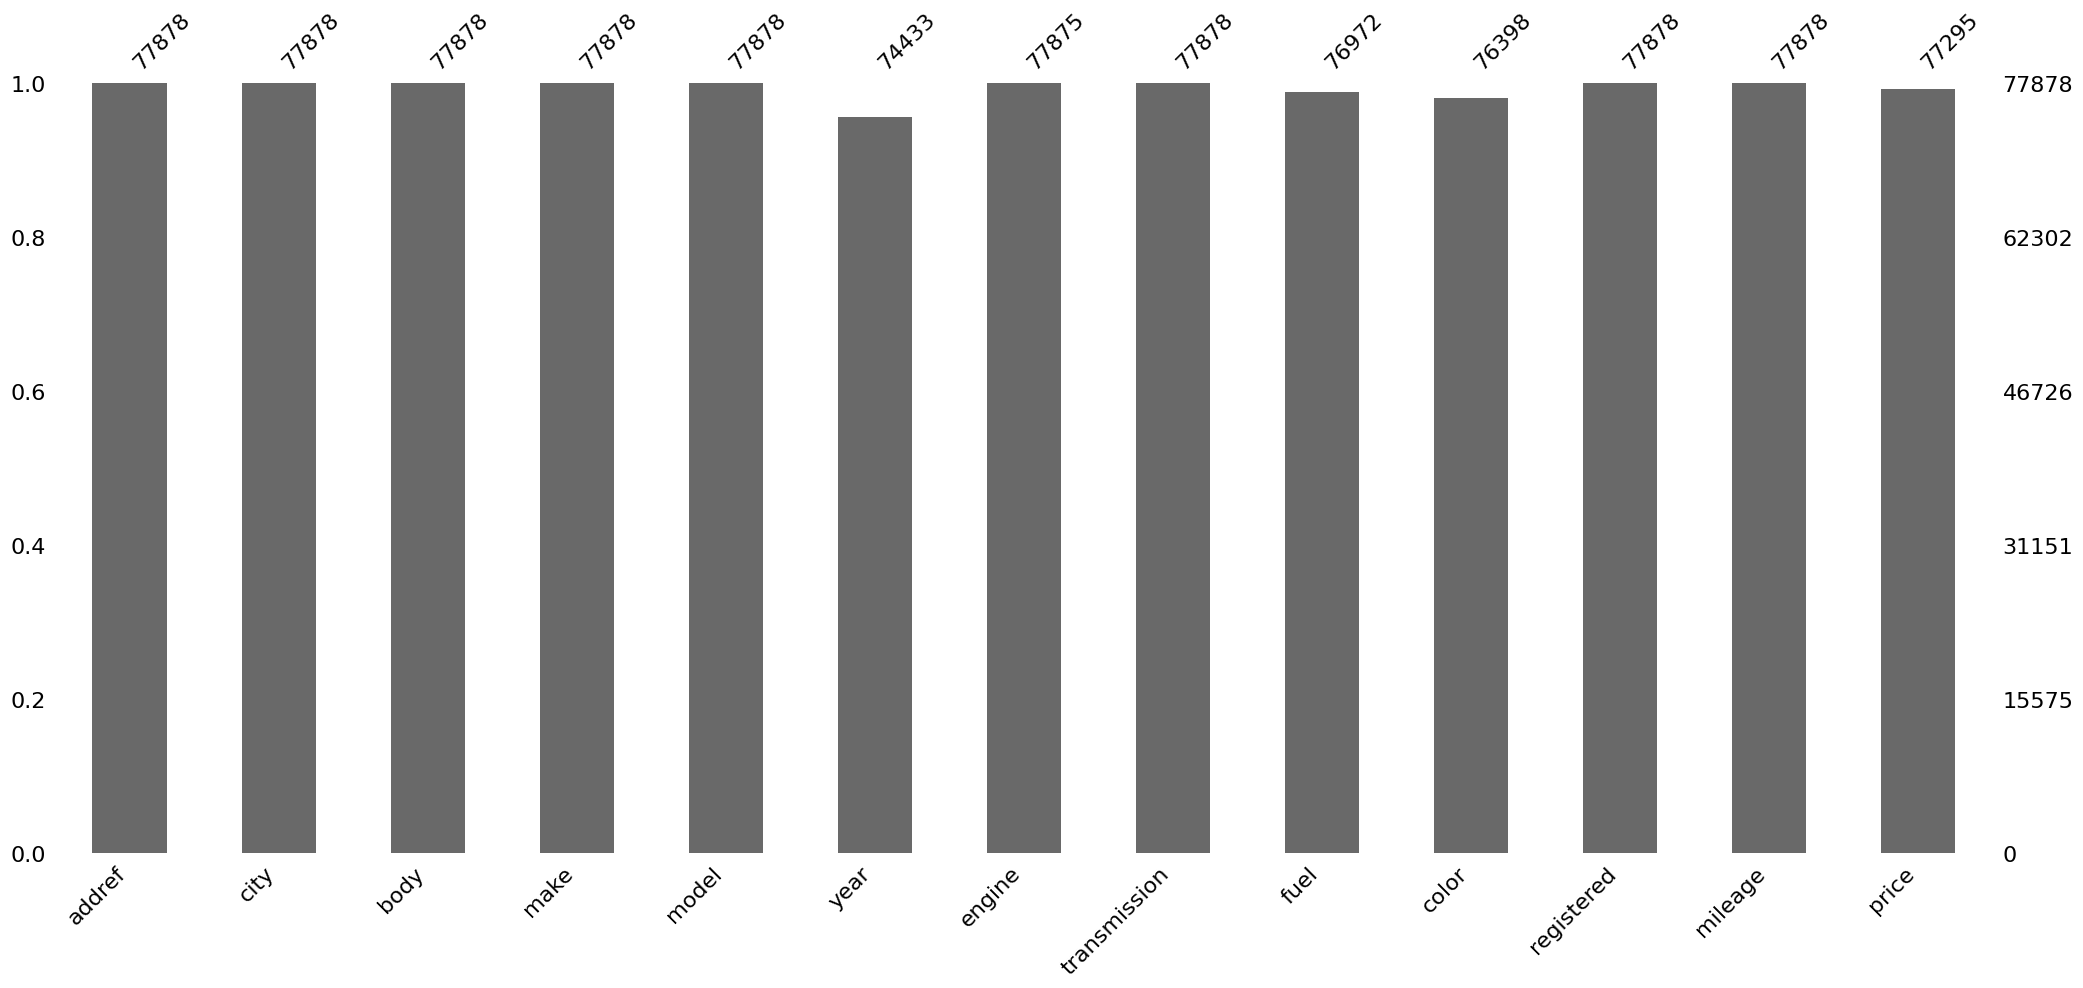

In [17]:
# Let's check variables with missing values
msno.bar(car_sales_df)
plt.show()

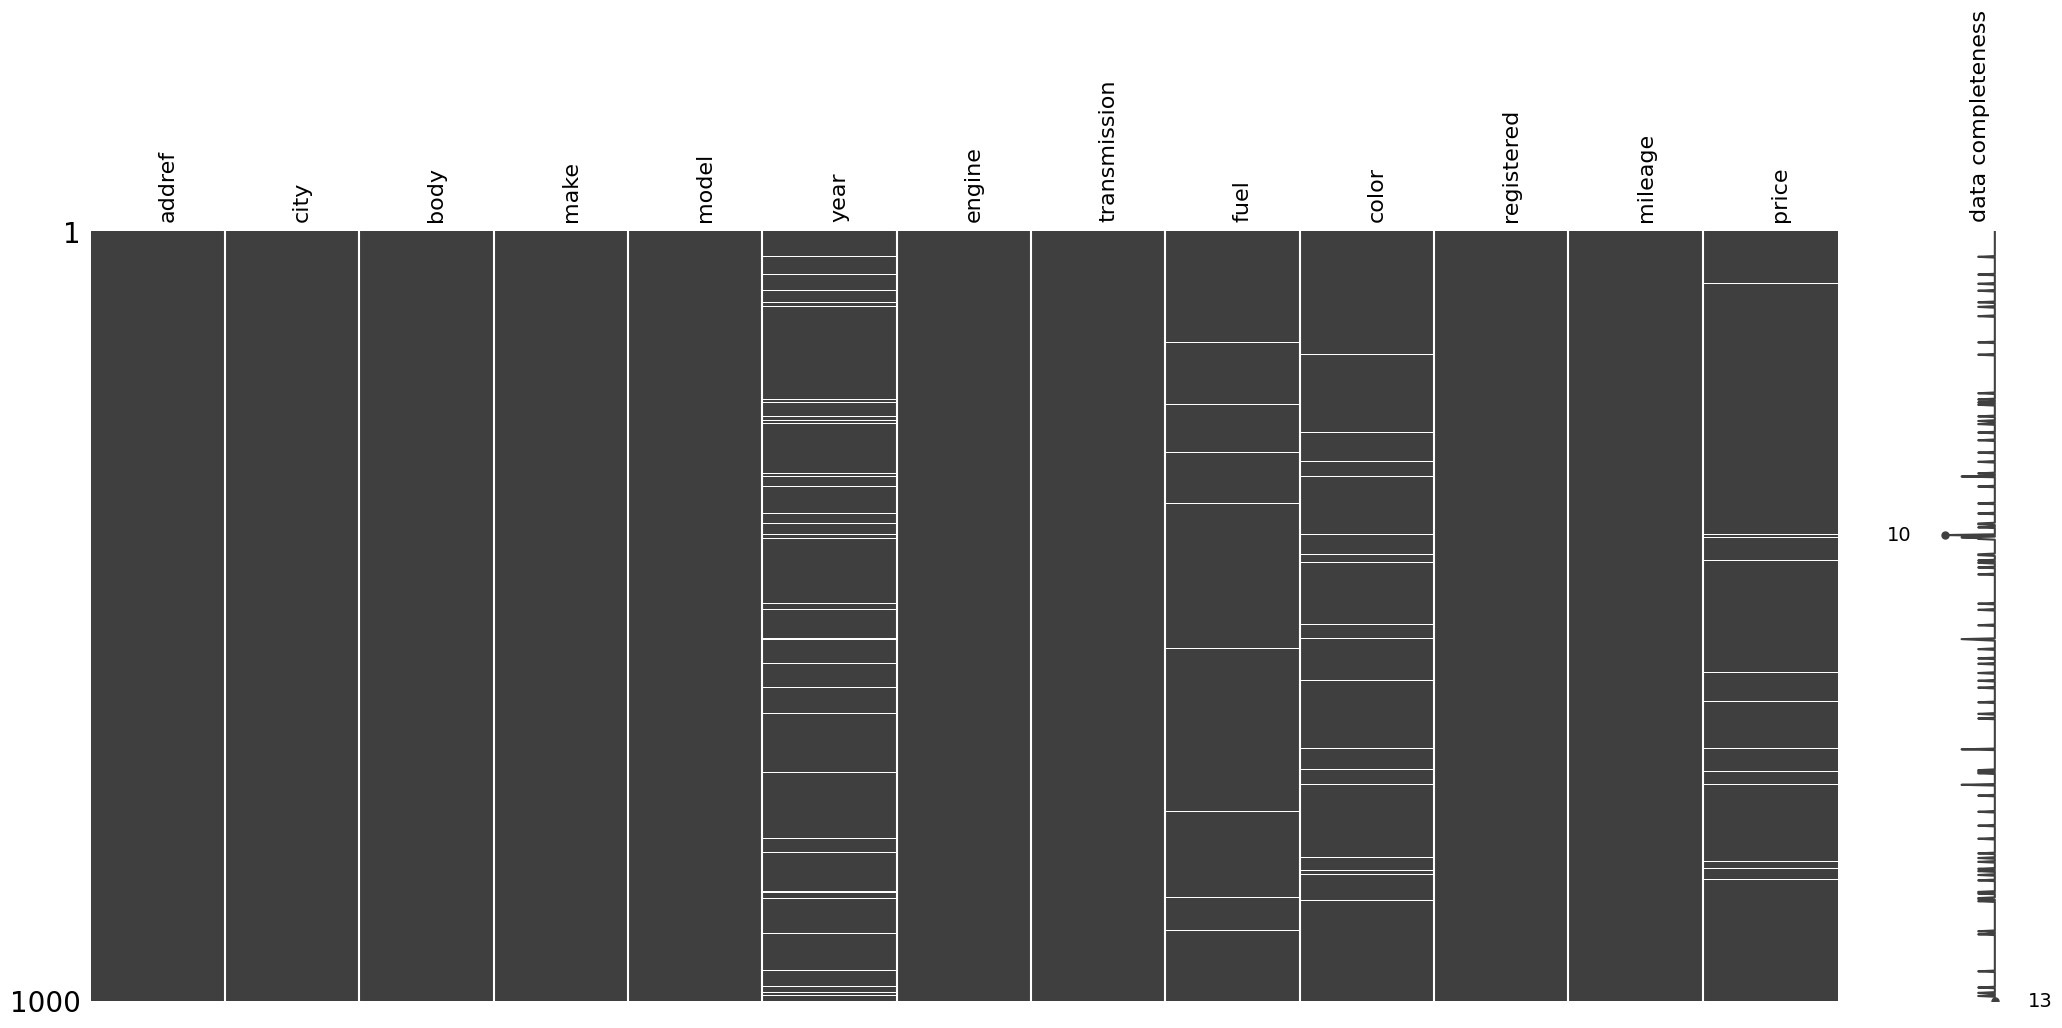

In [18]:
# We take 1000 random samples from our population
msno.matrix(car_sales_df.sample(1000), labels = True, label_rotation = 90)
plt.show()

###**Missing values ​​in variable assembly:**

In [14]:
#We analyze the assembly variable, which is the one that presents the most null data.
print('Percent missing values ​​for assembly variable:', (round(car_sales_df.assembly.isnull().sum()/len(car_sales_df),2)) * 100, '%')

Percent missing values ​​for assembly variable: 69.0 %


In [15]:
# Let's see the values ​​that assembly assumes
car_sales_df.assembly.value_counts()

Imported    24189
Name: assembly, dtype: int64

We observe that the **assembly** variable take one value ('imported'), so it does not provide significant information and with 70% missing data we can eliminate the assembly variable from our study


In [10]:
car_sales_df.drop(columns=['assembly'], inplace=True)

In [19]:
#Let's check the missing values
missing = car_sales_df.isna().sum()
missing

addref             0
city               0
body               0
make               0
model              0
year            3445
engine             3
transmission       0
fuel             906
color           1480
registered         0
mileage            0
price            583
dtype: int64

###**Missing values ​​in variable body:**

In [12]:
#We analyze the body variable, which is the one that presents the null data.
print('Percent missing values ​​for body variable:', (round(car_sales_df.body.isnull().sum()/len(car_sales_df),2)) * 100, '%')

Percent missing values ​​for body variable: 11.0 %


In [ ]:
# Let's see the values ​​that body variable assumes
# car_sales_df.body.value_counts()

We could execute a for block that replaces the null value of the body variable with the non-null value of records with identical data.

In [13]:
# We place NB (No Body) in the rows where there are missing values ​​in the body variable
car_sales_df.body.replace(np.nan, 'NB', inplace = True)

###**Missing values ​​in variable Year:**

In [17]:
#We analyze the year variable, which is the one that presents the null data.
print('Percent missing values ​​for year variable:', (round(car_sales_df.year.isnull().sum()/len(car_sales_df),2)) * 100, '%')

Percent missing values ​​for year variable: 6.0 %


In [ ]:
# Let's see the values ​​that year variable assumes
car_sales_df.year.value_counts()

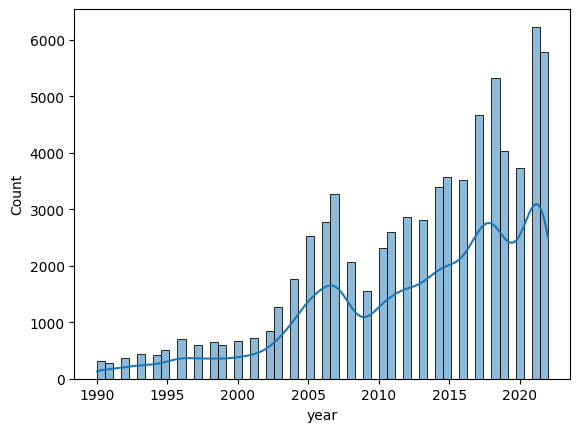

In [18]:
# Let's see how the variable is distributed
sns.histplot(x = 'year', data= car_sales_df, kde = True)
plt.show()

The year variable does not follow a normal frequency distribution so,for example, imputation of the values ​​cannot be applied using the mean; however by checking the data on the source file we observed that, for example, vehicles with short mileage (less than 100) belong to the year 2022 and there are many cases with the year value null.

In [21]:
#car_sales_df['year'].mask((car_sales_df['mileage'] < 100) AND (car_sales_df['year'] = NAN) ,2022, inplace=True)
car_sales_df['year'].mask((car_sales_df['mileage'] < 100 ) ,2022, inplace=True)

In [27]:
# We place year.mean() in the rows where there are missing values ​​in the year variable
car_sales_df.year.replace(np.nan, round(car_sales_df.year.mean(),0), inplace = True)

In [ ]:
# rows with null values ​​represent a very low percentage, so we can delete all rows with null values
# car_sales_df.dropna()

###**Missing values ​​in variable color:**

In [ ]:
# Let's see how the variable is distributed
plt.figure(figsize=(15,6))
sns.histplot(x = 'color', data= car_sales_df, kde = True)
plt.show()

In [ ]:
# Customize the graph with parameters to make it readable
# total_color = car_sales_df.color.value_counts()
# sns.catplot(x="color", kind="count", data =car_sales_df, aspect=2, order=total_color.index)

In [22]:
# We place NC (No Color) in the rows where we have missing values ​​in the color variable
car_sales_df.color.replace(np.nan, 'NC', inplace = True)

###**Missing values ​​in variable  fuel:**

In [23]:
# Let's see the values ​​that fuel variable assumes
car_sales_df.fuel.value_counts()

Petrol    70620
Diesel     3457
Hybrid     2895
Name: fuel, dtype: int64

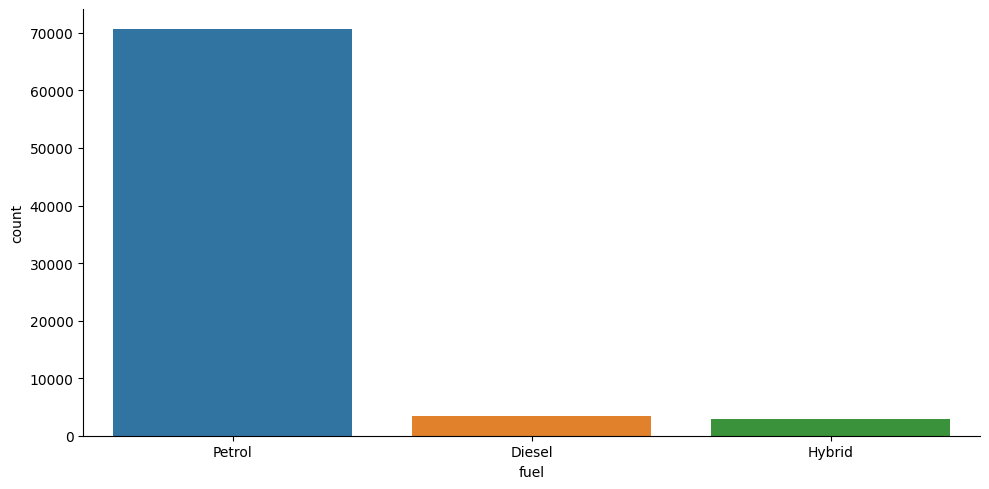

In [36]:
total_fuel = car_sales_df.fuel.value_counts()
sns.catplot(x="fuel", kind="count", data =car_sales_df, aspect=2, order=total_fuel.index)

Recommendation for this case: If we want to impute missingness with a Machine Learning model, an option could be [KNN-imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) , which uses a nearest neighbor model to predict data that has no value.

In [24]:
# We place NF (No Fuel) in the rows where there are missing values ​​in the fuel variable
car_sales_df.fuel.replace(np.nan, 'NF', inplace = True)

###**Missing values ​​in variable  price:**

In [ ]:
# Let's see the values ​​that color variable assumes
car_sales_df.price.value_counts()

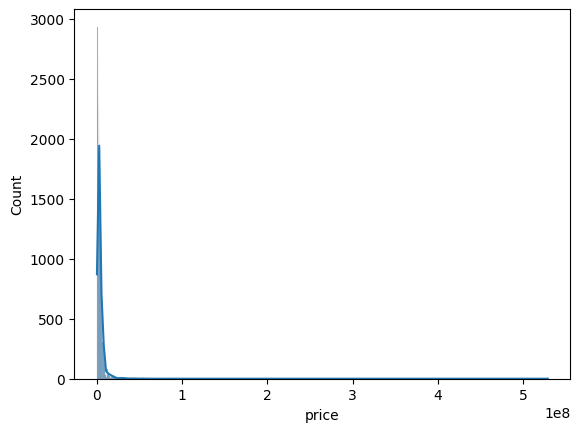

In [37]:
# Let's see how the variable is distributed
sns.histplot(x = 'price', data= car_sales_df, kde = True)
plt.show()

Since it is a continuous numerical variable with a normal distribution, we can make the imputation by the mean of the values ​​of the price variable. However, since very high positive integer values ​​do not mean outliers we can assume that we can leave them unchanged.

In [ ]:
#from sklearn.impute import SimpleImputer. We define, in strategy, the strategy that we will use for imputation.
# In this case, we use a measure of central tendency, more specifically, the mean.
# imputer = SimpleImputer(strategy = 'mean')
# imputer.fit(car_sales_df[['price']])
# car_sales_df['price'] = imputer.transform(car_sales_df[['price']])

However, for our study this could be the dependent Y variable and therefore it would be the result or output of a machine learning model that would be the final result of this study, therefore one option could be to eliminate records with null prices. the training and test data sets.

###**Missing values ​​in variable  engine:**

In [ ]:
# Let's see the values ​​that engine variable assumes
car_sales_df.engine.value_counts()

In [ ]:
# Customize the graph with parameters to make it readable
#total_engine = car_sales_df.engine.value_counts()
# sns.catplot(x="engine", kind="count", data =car_sales_df, aspect=2, order=total_engine.index)

In [25]:
# We place engine.mean() in the rows where there are missing values ​​in the engine variable
car_sales_df.engine.replace(np.nan, round(car_sales_df.engine.mean(),0), inplace = True)

In [56]:
#Let's check the missing values
missing = car_sales_df.isna().sum()
missing

addref          0
city            0
body            0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
color           0
registered      0
mileage         0
price           0
dtype: int64

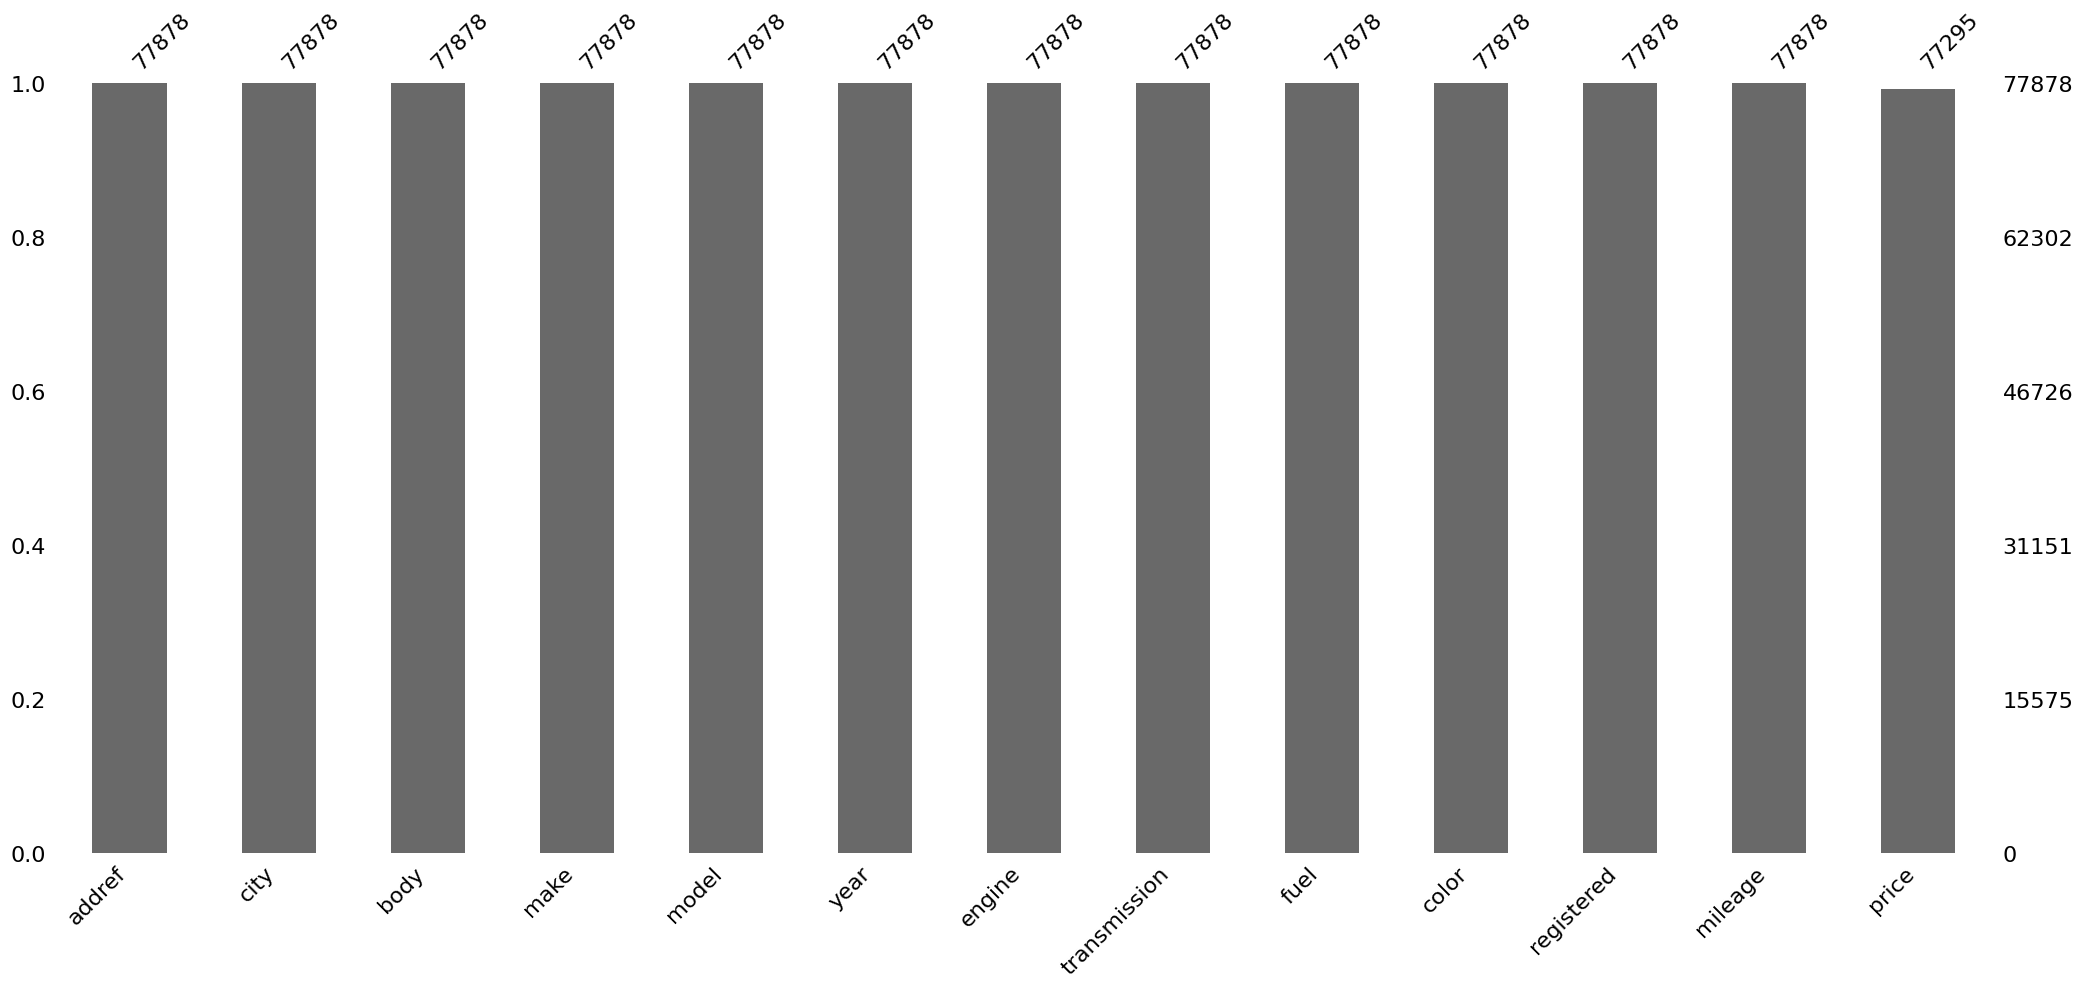

In [28]:
# Let's check variables with missing values
msno.bar(car_sales_df)
plt.show()

In [29]:
sales_data_file_path = '/content/drive/MyDrive/Colab Notebooks/240106-1_machine_learning_cars_price_prediction/datasets/non_null_sales_data.csv'
car_sales_df.to_csv(sales_data_file_path, header=True, index=False)

##**5.2 Treatment of extreme data and atypical data**


In [30]:
sales_data_file_path = '/content/drive/MyDrive/Colab Notebooks/240106-1_machine_learning_cars_price_prediction/datasets/non_null_sales_data.csv'
car_sales_df = pd.read_csv(sales_data_file_path)

In [8]:
#Let's check variables with outliers
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   body          77878 non-null  object 
 3   make          77878 non-null  object 
 4   model         77878 non-null  object 
 5   year          77878 non-null  float64
 6   engine        77878 non-null  float64
 7   transmission  77878 non-null  object 
 8   fuel          77878 non-null  object 
 9   color         77878 non-null  object 
 10  registered    77878 non-null  object 
 11  mileage       77878 non-null  int64  
 12  price         77878 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 7.7+ MB


###**Outlier values ​​in the variable year:**


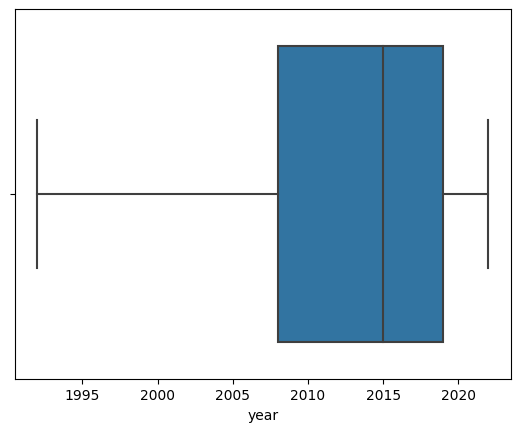

In [34]:
#let's check the quantitative variables: year, engine,mileage and price
sns.boxplot(x = 'year',  data= car_sales_df  )
plt.show()

In [31]:
# We use the interquartile range technique to eliminate outliers.
Q1 = car_sales_df['year'].quantile(0.25)
Q3 = car_sales_df['year'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

2008.0
2019.0
11.0
1991.5
2035.5


In [35]:
print('Number of total records:', car_sales_df.shape[0])
print('Number of outliers:', car_sales_df[(car_sales_df['year']<BI) | (car_sales_df['year']>BS)].shape[0] )

Number of total records: 77314
Number of outliers: 0


In [33]:
out_year = (car_sales_df['year']<BI) | (car_sales_df['year']>BS)
car_sales_df = car_sales_df[~out_year]

**Note:** We run this process one time to completely eliminate outliers from the variable.

###**Outlier values ​​in the variable engine:**


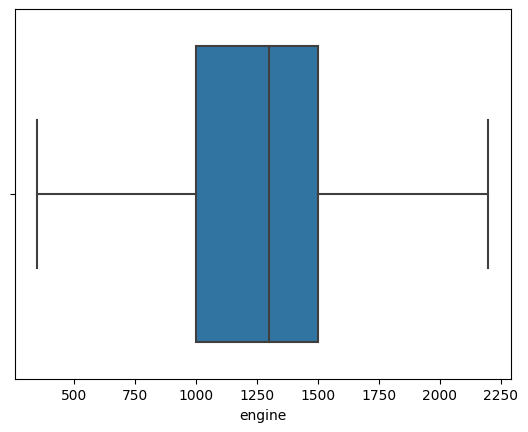

In [44]:
sns.boxplot(x = 'engine',  data= car_sales_df  )
plt.show()

In [41]:
Q1 = car_sales_df['engine'].quantile(0.25)
Q3 = car_sales_df['engine'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1000.0
1500.0
500.0
250.0
2250.0


In [42]:
print('Number of total records:', car_sales_df.shape[0])
print('Number of outliers:', car_sales_df[(car_sales_df['engine']<BI) | (car_sales_df['engine']>BS)].shape[0] )

Number of total records: 71931
Number of outliers: 1245


In [43]:
out_engine = (car_sales_df['engine']<BI) | (car_sales_df['engine']>BS)
car_sales_df = car_sales_df[~out_engine]

**Note:** We run this process two times to completely eliminate outliers from the variable.


###**Outlier values ​​in the variable mileage:**

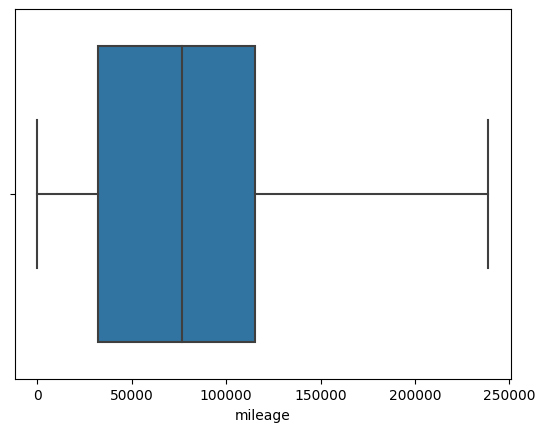

In [60]:
sns.boxplot(x = 'mileage',  data= car_sales_df  )
plt.show()

In [57]:
Q1 = car_sales_df['mileage'].quantile(0.25)
Q3 = car_sales_df['mileage'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

32413.75
115000.0
82586.25
-91465.625
238879.375


In [58]:
print('Number of total records:', car_sales_df.shape[0])
print('Number of outliers:', car_sales_df[(car_sales_df['mileage']<BI) | (car_sales_df['mileage']>BS)].shape[0] )

Number of total records: 68268
Number of outliers: 104


In [59]:
out_mileage = (car_sales_df['mileage']<BI) | (car_sales_df['mileage']>BS)
car_sales_df = car_sales_df[~out_mileage]

**Note:** We run this process three times to completely eliminate outliers from the variable.

###**Outlier values ​​in the variable price:**


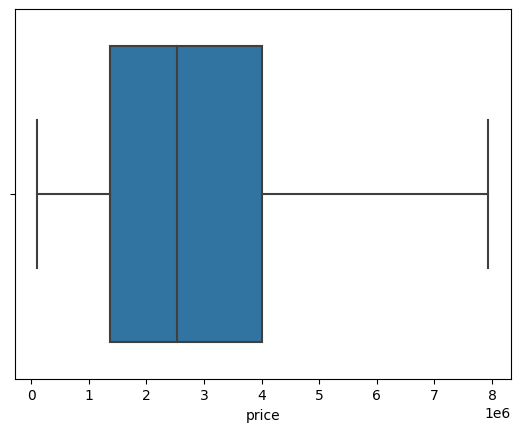

In [74]:
sns.boxplot(x = 'price',  data= car_sales_df  )
plt.show()

In [70]:
Q1 = car_sales_df['price'].quantile(0.25)
Q3 = car_sales_df['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1375000.0
4000000.0
2625000.0
-2562500.0
7937500.0


In [71]:
print('Number of total records:', car_sales_df.shape[0])
print('Number of outliers:', car_sales_df[(car_sales_df['price']<BI) | (car_sales_df['price']>BS)].shape[0] )

Number of total records: 65730
Number of outliers: 381


In [73]:
out_price = (car_sales_df['price']<BI) | (car_sales_df['price']>BS)
car_sales_df = car_sales_df[~out_price]

**Note:** We run this process three times to completely eliminate outliers from the variable.

In [75]:
sales_data_file_path = '/content/drive/MyDrive/Colab Notebooks/240106-1_machine_learning_cars_price_prediction/datasets/non_outliers_sales_data.csv'
car_sales_df.to_csv(sales_data_file_path, header=True, index=False)

##**5.3 Scaling or  normalization of variables**

In [4]:
sales_data_file_path = '/content/drive/MyDrive/Colab Notebooks/240106-1_machine_learning_cars_price_prediction/datasets/non_outliers_sales_data.csv'
car_sales_df = pd.read_csv(sales_data_file_path)

## **5.4 Coding of categorical variables**